In [3]:
import numpy as np
import pandas as pd
import scipy.optimize as opt
import matplotlib
import matplotlib.pyplot as plt
from uncertainties import ufloat
from uncertainties import unumpy
%matplotlib inline


In [4]:
def angle_to_wavelength(theta, slit_dist):
    return unumpy.sin(theta) * slit_dist

def get_angle(L, dist):
    return unumpy.arctan(dist / L)

def uflout_set_uncertainty(data, err):
    uflout_data = []
    for pt in data:
        uflout_data.append(ufloat(pt, err))
    return np.array(uflout_data)


In [25]:
def wave2rgb(wave):
    # This is a port of javascript code from  http://stackoverflow.com/a/14917481
    gamma = 0.8
    intensity_max = 1
 
    if wave < 380:
        red, green, blue = 0, 0, 0
    elif wave < 440:
        red = -(wave - 440) / (440 - 380)
        green, blue = 0, 1
    elif wave < 490:
        red = 0
        green = (wave - 440) / (490 - 440)
        blue = 1
    elif wave < 510:
        red, green = 0, 1
        blue = -(wave - 510) / (510 - 490)
    elif wave < 580:
        red = (wave - 510) / (580 - 510)
        green, blue = 1, 0
    elif wave < 645:
        red = 1
        green = -(wave - 645) / (645 - 580)
        blue = 0
    elif wave <= 780:
        red, green, blue = 1, 0, 0
    else:
        red, green, blue = 0, 0, 0
 
    # let the intensity fall of near the vision limits
    if wave < 380:
        factor = 0
    elif wave < 420:
        factor = 0.3 + 0.7 * (wave - 380) / (420 - 380)
    elif wave < 700:
        factor = 1
    elif wave <= 780:
        factor = 0.3 + 0.7 * (780 - wave) / (780 - 700)
    else:
        factor = 0
 
    def f(c):
        if c == 0:
            return 0
        else:
            return intensity_max * pow (c * factor, gamma)
 
    return (f(red), f(green), f(blue))


In [6]:
dist = np.array([10.83, 11.9, 12.51, 12.75, 14.47, 14.51, 15.14, 15.48, 16.02, 17.55])
dist_pm = uflout_set_uncertainty(dist, .07)
L = ufloat(50, .1)
d = ufloat(2062.5e-9, 50e-9)

data = angle_to_wavelength(get_angle(L, dist_pm), d)

In [86]:
dist = np.array([10.05, 10.47, 12.32, 12.70, 13.85, 14.13, 15.84, 15.97])
dist_pm = uflout_set_uncertainty(dist, .07)
L = ufloat(50, .1)
d = ufloat(2062.5e-9, 50e-9)

data = angle_to_wavelength(get_angle(L, dist_pm), d)


In [ ]:
dist = np.array([13.62, 14.86, 16.12])
dist_pm = uflout_set_uncertainty(dist, .07)
L = ufloat(50, .1)
d = ufloat(2062.5e-9, 50e-9)

data = angle_to_wavelength(get_angle(L, dist_pm), d)



In [81]:
50/2062

0.02424830261881668

In [89]:
dist = np.array([9.925, 18.725])
dist_pm = uflout_set_uncertainty(dist, .07)
L = ufloat(50, .1)
d = ufloat(2062.5e-9, 50e-9)

data = angle_to_wavelength(get_angle(L, dist_pm), d)
for point in data:
    print(u'{:.2eP}'.format(point))

(4.02±0.10)×10⁻⁷
(7.23±0.18)×10⁻⁷


In [79]:
dist = np.array([15.17, 16.00, 16.03, 16.88])
dist_pm = uflout_set_uncertainty(dist, .07)
L = ufloat(50, .1)
d = ufloat(2062.5e-9, 50e-9)

data = angle_to_wavelength(get_angle(L, dist_pm), d)

In [87]:
for point in data:
    print(u'{:.2eP}'.format(point))

(4.06±0.10)×10⁻⁷
(4.23±0.11)×10⁻⁷
(4.93±0.12)×10⁻⁷
(5.08±0.13)×10⁻⁷
(5.51±0.14)×10⁻⁷
(5.61±0.14)×10⁻⁷
(6.23±0.15)×10⁻⁷
(6.28±0.15)×10⁻⁷


In [34]:
dist = np.array([10.44, 10.93, 12.40, 17.18])
dist_pm = uflout_set_uncertainty(dist, .1)
L = ufloat(50, .1)
d = ufloat(2062.5e-9, 50e-9)

data = angle_to_wavelength(get_angle(L, dist_pm), d)

for point in data:
    print(u'{:.2eP}'.format(point))


(4.22±0.11)×10⁻⁷
(4.40±0.11)×10⁻⁷
(4.96±0.13)×10⁻⁷
(6.70±0.17)×10⁻⁷


In [11]:
pres_lines_neon = np.array([585, 603, 607, 614, 616, 622, 627, 638, 640, 651, 660, 693])
strong_lines_argon = np.array([522, 550, 556, 561, 565, 589, 591, 603, 604, 606, 611, 617, 624, 638, 642])

In [63]:
# f, axarr = plt.subplots(2, sharex=True)
# # plt.xlim(x[0],x[-1])
# for wvl in pres_lines_neon:
#     axarr[0].axvline(wvl, c=wave2rgb(wvl))
# axarr[0].axes.yaxis.set_ticklabels([])
# for wvl in [599, 629, 630, 660]:
#     axarr[1].axvline(wvl, c=wave2rgb(wvl))
# axarr[1].axes.yaxis.set_ticklabels([])
# # axarr[0].plot(x, y1,'r')
# # axarr[0].set_title("Exp 1: ")
# # axarr[0].set_ylabel('Force (N)')
# # axarr[1].plot(x, y2,'b')
# # axarr[1].set_xlabel('time (s)')
# # axarr[1].set_ylabel('Position (m)')
# plt.show()

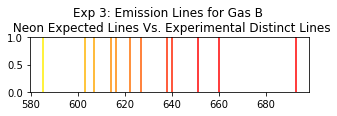

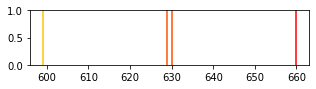

In [84]:
plt.figure(figsize=(5, 1))
for wvl in pres_lines_neon:
    plt.axvline(wvl, c=wave2rgb(wvl))
plt.title("Exp 3: Emission Lines for Gas B \n Neon Expected Lines Vs. Experimental Distinct Lines")

plt.figure(figsize=(5, 1))
for wvl in [599, 629, 630, 660]:
    plt.axvline(wvl, c=wave2rgb(wvl))


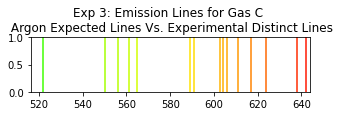

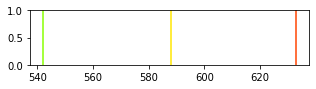

In [85]:
plt.figure(figsize=(5, 1))
for wvl in strong_lines_argon:
    plt.axvline(wvl, c=wave2rgb(wvl))
# plt.yticks([],"")
plt.title("Exp 3: Emission Lines for Gas C \n Argon Expected Lines Vs. Experimental Distinct Lines")


plt.figure(figsize=(5, 1))
for wvl in [542, 588, 633]:
    plt.axvline(wvl, c=wave2rgb(wvl))
# plt.yticks([],"")


In [ ]:
406±10
423±11
493±12
508±13
551±14
561±14
623±15
628±15

In [90]:
np.mean([15.38, 15.40, 15.13, 15.31])

15.305000000000001

In [91]:
np.std([15.38, 15.40, 15.13, 15.31])

0.10641898326896372

In [93]:
np.std([15.38, 15.40, 15.13, 15.31]) / np.sqrt(len([15.38, 15.40, 15.13, 15.31]))

0.05320949163448186

In [120]:
dist = np.array([ 17.18, 12.40, 10.93, 10.44])
dist_pm = uflout_set_uncertainty(dist, .07)
L = ufloat(50, .1)
d = ufloat(2062.5e-9, 50e-9)

data = angle_to_wavelength(get_angle(L, dist_pm), d)
for point in data:
    print(u'{:.2eP}'.format(point))

(6.70±0.16)×10⁻⁷
(4.96±0.12)×10⁻⁷
(4.40±0.11)×10⁻⁷
(4.22±0.11)×10⁻⁷


In [132]:
h = 6.626e-34
c = 299792458

def model(x, R):
    return R * (x - 1/4)


In [133]:
n = np.array([3,4,5,6])
x = 1 / n ** 2
y_pm = 1 / data
y = unumpy.nominal_values(y_pm)
y_err = unumpy.std_devs(y_pm)

In [140]:
# Does the fit with adjusted xerr
init_params=[0]
lin_opt, lin_cov = opt.curve_fit(model, x, y, sigma=y_err, absolute_sigma=True, p0=init_params)

#Weighted Best Fit Values
R = lin_opt
Rerr = np.sqrt(np.diag(lin_cov))

Rpm = ufloat(R, Rerr)

print(u'{:.2eP}'.format(Rpm))

(-1.07±0.01)×10⁷


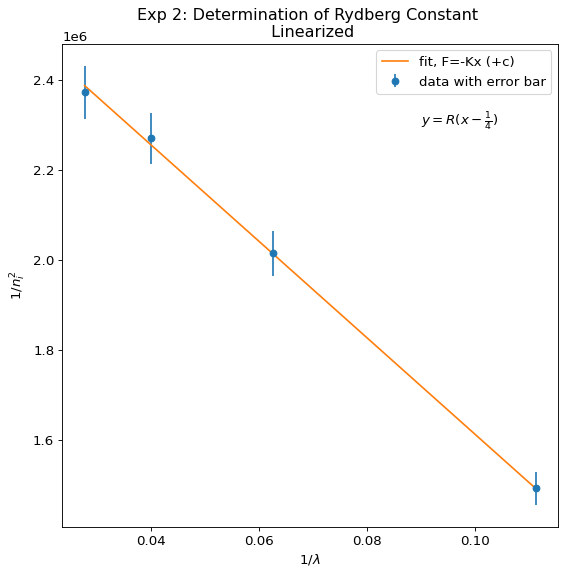

In [139]:
fig1=plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '12'})

plt.errorbar(x, y, yerr=y_err, fmt='o', label="data with error bar")
x_space = np.linspace(x[0],x[-1])
plt.plot(x_space, model(x_space, R), label='fit, F=-Kx (+c)', color='tab:orange')

plt.title("Exp 2: Determination of Rydberg Constant \n Linearized")
plt.xlabel(r"$1/\lambda$")
plt.ylabel(r"$1/n_i^2$")

plt.text(.09, 2.3e6, r"$y=R(x-\frac{1}{4})$")
# plt.text(.14,-.7, "c = %5.4f \u00b1 %5.4f $N$" % (b, db))
# plt.xlim(0,.257)
# plt.ylim(-3.7,0)
plt.legend()
plt.show()